In [1]:
import numpy as np
import scanpy as sc


In [17]:
import os

files = os.listdir("data/significant_subpopulations")

In [58]:
data_names = []
data_pseudobulk_expression = []
disease = []
for f in files:
    cluster_k = sc.read(f"data/significant_subpopulations/{f}")
    pseudobulk = cluster_k.X.mean(axis=0)
    name = f.replace("cluster", "").replace(".h5ad", "")
    condition = cluster_k.obs["disease"].value_counts().idxmax()

    data_names.append(name)
    data_pseudobulk_expression.append(pseudobulk)
    disease.append(condition)

In [63]:
import pandas as pd
import numpy as np

mean_expression_df = pd.DataFrame(np.squeeze(data_pseudobulk_expression), columns=cluster_k.var["feature_name"])
mean_expression_df.index = data_names

name_condition = pd.DataFrame({"name":data_names, "condition": disease})

In [64]:
alzheimers_clusters = name_condition[name_condition["condition"] != "normal"]
normal_clusters = name_condition[name_condition["condition"] == "normal"]

In [88]:
normal_clusters_expression = mean_expression_df.loc[normal_clusters["name"]]
alzheimers_clusters_expression = mean_expression_df.loc[alzheimers_clusters["name"]]

In [110]:
df_combined = pd.concat([normal_clusters_expression, alzheimers_clusters_expression])

In [92]:
corr_matrix = df_combined.T.corr(method='pearson')

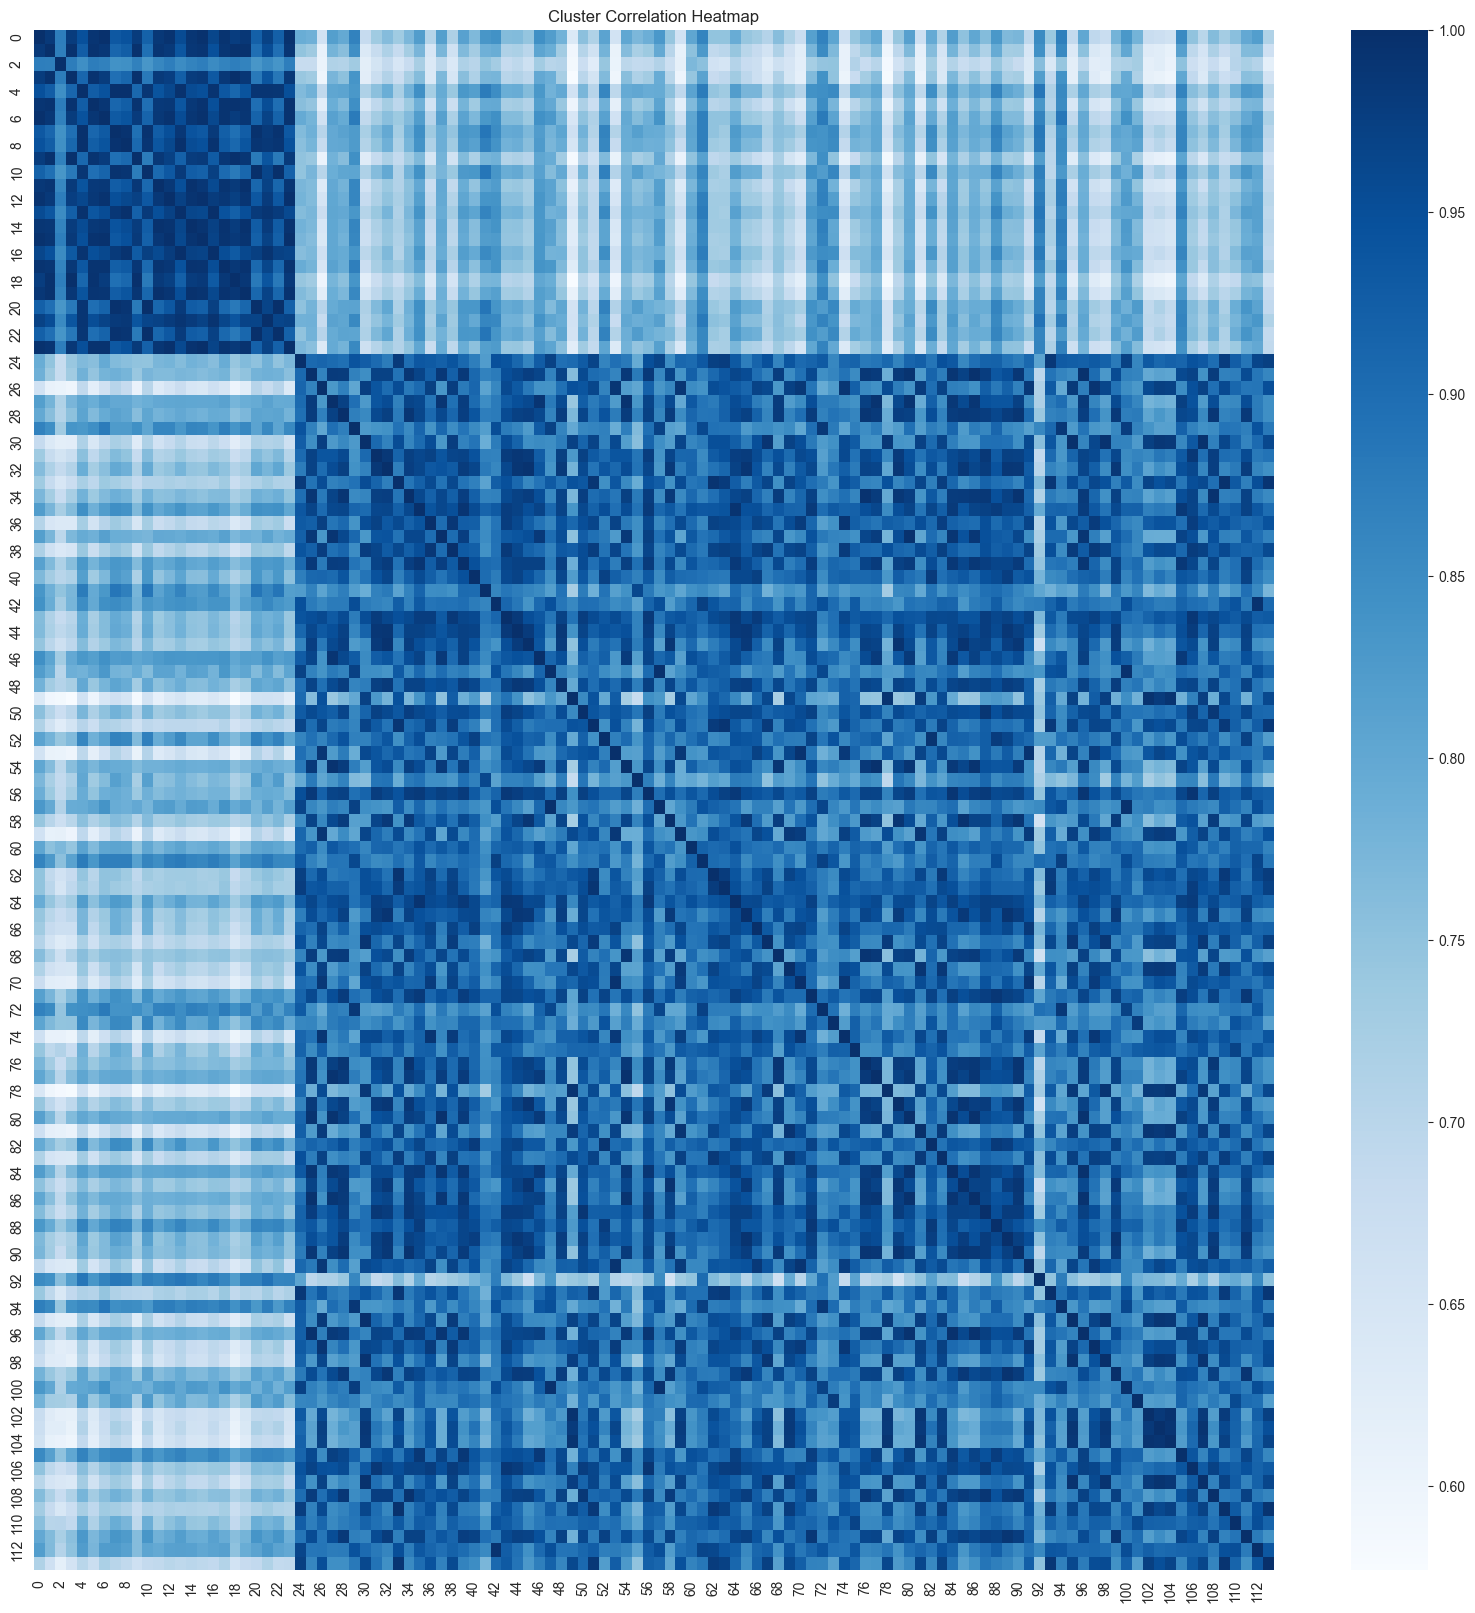

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap="Blues")
plt.title("Cluster Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

In [119]:
df_combined.iloc[92]

feature_name
ENSG00000284739    0.000000
ENSG00000284694    0.002497
ENSG00000230021    4.098705
MTCYBP45           0.000000
CA6                0.000000
                     ...   
DAZ3               0.000000
NLGN4Y             0.016673
GYG2P1             0.008886
ENSG00000274792    0.000000
5S_rRNA            0.000000
Name: 4376, Length: 5000, dtype: float32